In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [35]:
chardatajeju_df = pd.read_excel('서울21년1월부터12월이상치제거.xlsx')
chardatajeju_df

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,2,남서울,강남,LH강남힐스테이트,급속01,6452,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33,서울특별시,강남구,자곡동 자곡로3길 21
1,9,남서울,서초,아크로리버파크,완속01,3848,서울특별시 서초구 반포동 2-12,완속,7.0,11.00,2,21,2021-01-01,2021-01-01 21:24:22,2021-01-01 23:45:30,서울특별시,서초구,반포동 2-12
2,18,남서울,강남,타워팰리스1차,완속03,2343,서울특별시 강남구 도곡동 언주로30길 56,완속,7.0,50.00,8,0,2021-01-01,2021-01-01 15:26:41,2021-01-01 23:26:44,서울특별시,강남구,도곡동 언주로30길 56
3,21,남서울,강남,대치2문화센터 공영주차장,급속01,9546,서울특별시 강남구 영동대로65길 24,급속,50.0,6.47,0,12,2021-01-01,2021-01-01 23:43:01,2021-01-01 23:55:23,서울특별시,강남구,영동대로65길 24
4,22,서울,서대문은평,연세대학교,급속02,9660,"서울특별시 서대문구 연세로 50 (신촌동, 연세대학교)",급속,50.0,12.18,0,15,2021-01-01,2021-01-01 23:43:34,2021-01-01 23:58:49,서울특별시,서대문구,"연세로 50 (신촌동, 연세대학교)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304721,2097119,서울,광진성동,뚝도충전소,급속01,828,서울특별시 광진구 자양3동 510-8,급속,50.0,8.61,0,17,2021-10-17,2021-10-17 12:33:53,2021-10-17 12:51:33,서울특별시,광진구,자양3동 510-8
304722,2097124,서울,마포용산,마포래미안푸르지오 1단지,급속01,6251,서울특별시 마포구 아현동 마포대로 195,급속,50.0,33.88,0,45,2021-10-17,2021-10-17 20:13:13,2021-10-17 20:58:46,서울특별시,마포구,아현동 마포대로 195
304723,2097126,서울,서울직할,국립중앙극장,급속02,9903,"서울특별시 중구 장충단로 59 (장충동2가, 국립극장)",급속,50.0,26.58,1,36,2021-10-17,2021-10-17 19:21:25,2021-10-17 20:58:13,서울특별시,중구,"장충단로 59 (장충동2가, 국립극장)"
304724,2097127,남서울,관악동작,관악동작 견인차량 보관소,급속01,6904,서울특별시 관악구 신사로 7,급속,50.0,24.27,0,56,2021-10-17,2021-10-16 23:16:43,2021-10-17 00:13:29,서울특별시,관악구,신사로 7


In [36]:
chardatajeju20_df = chardatajeju_df.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [37]:
# chardatajeju20_df = chardatajeju20_df.drop_duplicates()
chardatajeju20_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
0,남서울,강남,LH강남힐스테이트,급속01,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,강남구
1,남서울,서초,아크로리버파크,완속01,서울특별시 서초구 반포동 2-12,완속,7.0,서초구
2,남서울,강남,타워팰리스1차,완속03,서울특별시 강남구 도곡동 언주로30길 56,완속,7.0,강남구
3,남서울,강남,대치2문화센터 공영주차장,급속01,서울특별시 강남구 영동대로65길 24,급속,50.0,강남구
4,서울,서대문은평,연세대학교,급속02,"서울특별시 서대문구 연세로 50 (신촌동, 연세대학교)",급속,50.0,서대문구
...,...,...,...,...,...,...,...,...
304721,서울,광진성동,뚝도충전소,급속01,서울특별시 광진구 자양3동 510-8,급속,50.0,광진구
304722,서울,마포용산,마포래미안푸르지오 1단지,급속01,서울특별시 마포구 아현동 마포대로 195,급속,50.0,마포구
304723,서울,서울직할,국립중앙극장,급속02,"서울특별시 중구 장충단로 59 (장충동2가, 국립극장)",급속,50.0,중구
304724,남서울,관악동작,관악동작 견인차량 보관소,급속01,서울특별시 관악구 신사로 7,급속,50.0,관악구


In [38]:
print(chardatajeju20_df['구'].value_counts())

송파구     34318
강남구     31322
마포구     21842
서초구     20004
용산구     18689
강동구     15658
도봉구     15049
광진구     12919
강서구     12058
노원구     11966
영등포구    11312
양천구     11247
구로구     11028
성북구      9754
성동구      8898
중구       8524
동대문구     7284
중랑구      6400
종로구      5983
동작구      5957
관악구      5201
서대문구     5081
은평구      4350
금천구      4278
강북구      4097
Name: 구, dtype: int64


In [39]:
chardatajeju20_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          강남구
1          서초구
2          강남구
3          강남구
4         서대문구
          ... 
304721     광진구
304722     마포구
304723      중구
304724     관악구
304725     서초구
Name: 구, Length: 304726, dtype: object>

In [40]:
# 2020년 제주도 구별 충전소 가동률
np.round(chardatajeju20_df['구'].value_counts().div(1621),2)

송파구     21.17
강남구     19.32
마포구     13.47
서초구     12.34
용산구     11.53
강동구      9.66
도봉구      9.28
광진구      7.97
강서구      7.44
노원구      7.38
영등포구     6.98
양천구      6.94
구로구      6.80
성북구      6.02
성동구      5.49
중구       5.26
동대문구     4.49
중랑구      3.95
종로구      3.69
동작구      3.67
관악구      3.21
서대문구     3.13
은평구      2.68
금천구      2.64
강북구      2.53
Name: 구, dtype: float64

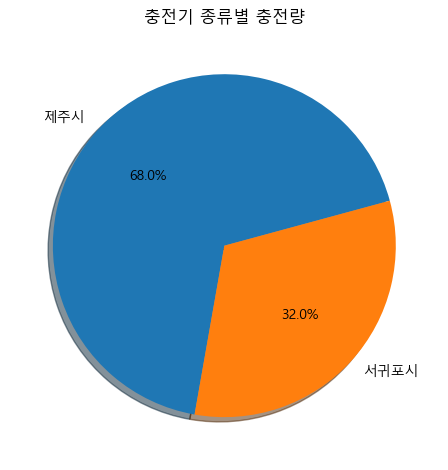

In [41]:
# 2020년 전기차 충전소 가동비율 그래프
ratio = [68,32]
labels = ['제주시', '서귀포시']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.title('충전기 종류별 충전량')
plt.tight_layout()
plt.show()

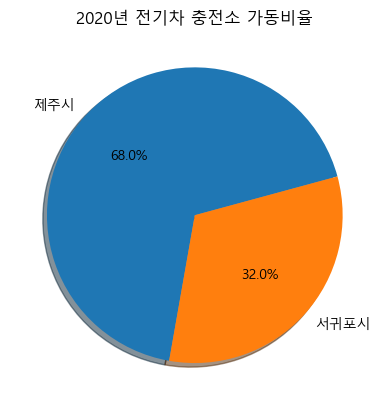

In [42]:
import matplotlib.pyplot as plt

ratio = [68,32]
labels = ['제주시', '서귀포시']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.title('2020년 전기차 충전소 가동비율')
plt.show()


In [43]:
# 2020년 제주도 전기차 충전소 급속, 완속 충전기합
print(chardatajeju20_df['충전기구분'].value_counts())

완속    163243
급속    141483
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

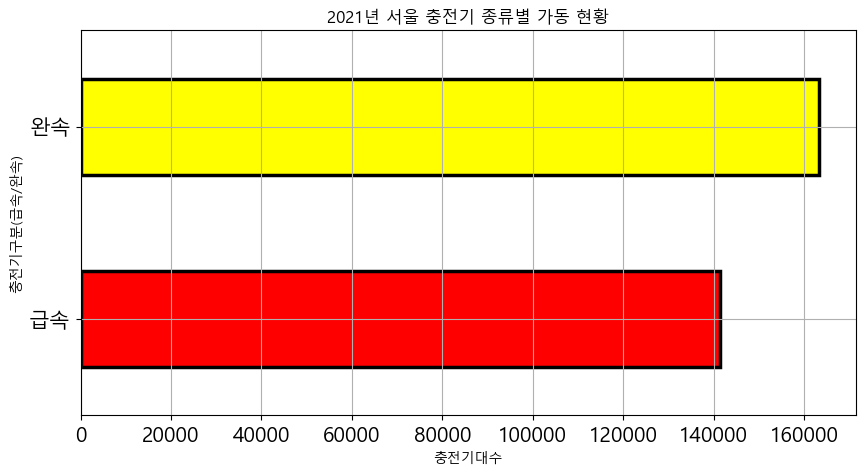

In [44]:
# 20년도 충전기 대수 가동 현황 총합 (완속, 급속)

chargerjeju20dist = pd.value_counts(chardatajeju20_df['충전기구분'].values, sort=True, ascending = True)
chargerjeju20dist.plot.barh()
chargerjeju20dist.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)
plt.title('2021년 서울 충전기 종류별 가동 현황')
plt.xlabel('충전기대수')
plt.ylabel('충전기구분(급속/완속)')

In [45]:
# 2020년도 제주도 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargerjeju20_df = chardatajeju20_df[['구', '충전기구분']]
chargerjeju20_df = chargerjeju20_df.groupby(["구", "충전기구분"]).size()
pd.DataFrame(chargerjeju20_df)

0
구    충전기구분       
강남구  급속     10923
     완속     20399
강동구  급속      8208
     완속      7450
강북구  급속      2846
     완속      1251
강서구  급속      4416
     완속      7642
관악구  급속      2925
     완속      2276
광진구  급속      9049
     완속      3870
구로구  급속      5499
     완속      5529
금천구  급속      3984
     완속       294
노원구  급속      6160
     완속      5806
도봉구  급속     10062
     완속      4987
동대문구 급속      3248
     완속      4036
동작구  급속      1810
     완속      4147
마포구  급속      9584
     완속     12258
서대문구 급속      1430
     완속      3651
서초구  급속      6903
     완속     13101
성동구  급속      2630
     완속      6268
성북구  급속      3373
     완속      6381
송파구  급속     14154
     완속     20164
양천구  급속      6502
     완속      4745
영등포구 급속      4341
     완속      6971
용산구  급속      8192
     완속     10497
은평구  급속      3391
     완속       959
종로구  급속      2299
     완속      3684
중구   급속      6216
     완속      2308
중랑구  급속      3338
     완속      3062

In [46]:
# # 2020년도 제주도 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

# chardatajeju20_df.plot.bar()
# chardatajeju20_df.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
# plt.xticks(rotation = 90)
# plt.title('2020년 서울 구별 충전기 종류별 가동 현황')
# plt.xlabel('서울 구별, 충전기구분(급속/완속)')
# plt.ylabel('충전기대수')

In [47]:
# 202년도 전기차충전소 사용빈도(제주시/서귀포시)
print(chardatajeju_df['구'].value_counts())

송파구     34318
강남구     31322
마포구     21842
서초구     20004
용산구     18689
강동구     15658
도봉구     15049
광진구     12919
강서구     12058
노원구     11966
영등포구    11312
양천구     11247
구로구     11028
성북구      9754
성동구      8898
중구       8524
동대문구     7284
중랑구      6400
종로구      5983
동작구      5957
관악구      5201
서대문구     5081
은평구      4350
금천구      4278
강북구      4097
Name: 구, dtype: int64


Text(0, 0.5, '서울 구별')

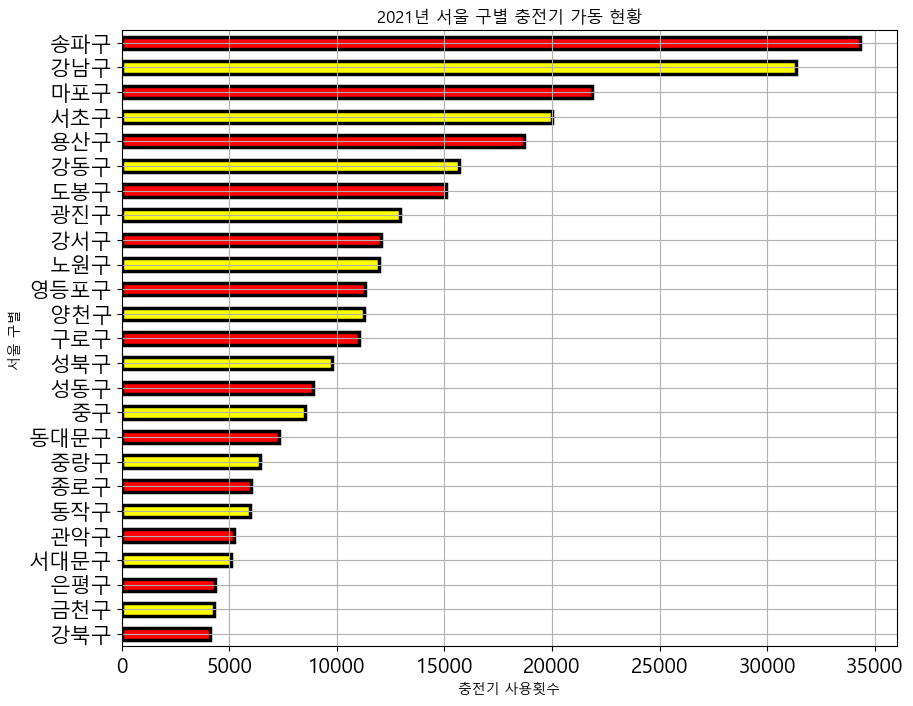

In [48]:
# 2020년도 제주도 전기차 충전소 사용 빈도 시각화

chargecountjeju20_df = pd.value_counts(chardatajeju_df['구'].values, sort=True, ascending = True)
chargecountjeju20_df.plot.barh()
chargecountjeju20_df.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2021년 서울 구별 충전기 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('서울 구별')

In [49]:
# 2020년도 전기차충전소 사용빈도(급속/완속)
print(chardatajeju_df['충전기구분'].value_counts())

완속    163243
급속    141483
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

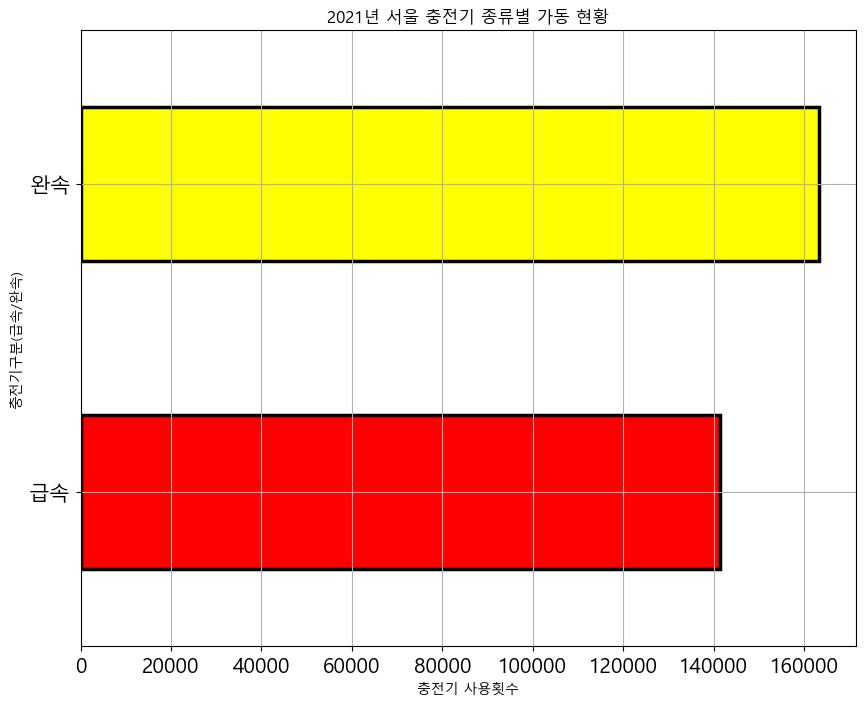

In [50]:
# 2020년도 제주도 전기차 충전소(급속/완속) 사용 빈도 시각화

chargetypecountjeju20_df = pd.value_counts(chardatajeju_df['충전기구분'].values, sort=True, ascending = True)
chargetypecountjeju20_df.plot.barh()
chargetypecountjeju20_df.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2021년 서울 충전기 종류별 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('충전기구분(급속/완속)')